In [9]:
import mlxtend
import pandas as pd

## Clothing company
the strategies can be based on which items should be put together

In [2]:
dataset_1= [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [11]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset_1).transform(dataset_1)    
df_1=pd.DataFrame(te_ary, columns=te.columns_)
df_1

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [14]:
from mlxtend.frequent_patterns import apriori
apriori(df_1, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [15]:
frequent_itemsets=apriori(df_1, min_support=0.6, use_colnames=True) 
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [54]:
from mlxtend.frequent_patterns import association_rules 
ar=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [22]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [23]:
# skirt and pants are put together

## Bigger dataset !

In [56]:
url='https://drive.google.com/file/d/109dPPJzZbjzMUp3JQBx5rQ538fzMNYzU/'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_2= pd.read_csv(dwn_url,header=None)

In [58]:
df_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
unique_items= (df_2[0].unique())
print(unique_items)

['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'
 'eggplant' 'mushroom cre

In [63]:
## one hot encoding
encoded_vals = []
for i, rows in df_2.iterrows():
    labels={}
    uncommons= list(set(unique_items) - set(rows))
    commons= list(set(unique_items).intersection(rows))
    for uc in uncommons:
        labels[uc]  = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]

encode_df= pd.DataFrame(encoded_vals)

encode_df

,cider,cereals,pasta,pancakes,turkey,champagne,magazines,light mayo,candy bars,sandwich,...,cottage cheese,yams,energy drink,antioxydant juice,green grapes,vegetables mix,avocado,whole weat flour,mineral water,salmon
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
frequent_itemsets=apriori(encode_df, min_support=0.08, use_colnames=True) 
frequent_itemsets

,support,itemsets
0,0.095054,(pancakes)
1,0.098254,(ground beef)
2,0.163845,(chocolate)
3,0.129583,(milk)
4,0.179709,(eggs)
5,0.174110,(spaghetti)
6,0.081056,(cake)
7,0.170911,(french fries)
8,0.080389,(cookies)
9,0.095321,(frozen vegetables)


In [72]:
ar=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.08)
ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


In [88]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


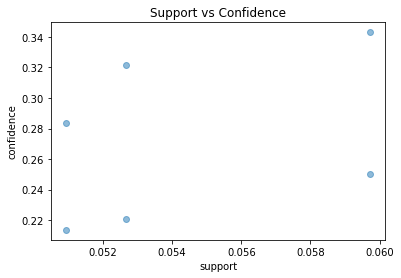

In [84]:
plt.scatter(ar['support'], ar['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

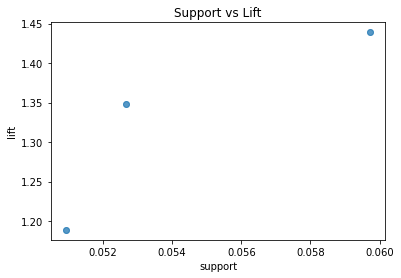

In [86]:
plt.scatter(ar['support'], ar['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()